In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading
df = pd.read_csv("./sample_data/data_jobs.csv")

In [3]:
# Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

In [4]:
df_FR = df[df["job_country"] == "France"]

In [5]:
df_FR.loc["job_posted_monthly"] = df_FR.loc[:,"job_posted_date"].dt.strftime("%B")

C:\Users\lambe\AppData\Local\Temp\ipykernel_13212\1551581540.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_FR.loc["job_posted_monthly"] = df_FR.loc[:,"job_posted_date"].dt.strftime("%B")
C:\Users\lambe\AppData\Local\Temp\ipykernel_13212\1551581540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FR.loc["job_posted_monthly"] = df_FR.loc[:,"job_posted_date"].dt.strftime("%B")


In [6]:
df_FR_pivot = df_FR.pivot_table(index="job_posted_monthly",columns="job_title_short",aggfunc="size")

KeyError: 'job_posted_monthly'

In [28]:
df_FR_pivot.reset_index(inplace=True)
df_FR_pivot["month_number"] = pd.to_datetime(df_FR_pivot["job_posted_monthly"], format="%B").dt.month

df_FR_pivot["month_number"]

0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: month_number, dtype: int32

In [31]:
df_FR_pivot.sort_values("month_number",inplace=True)

In [35]:
df_FR_pivot.set_index("job_posted_monthly",inplace=True)

In [42]:
df_FR_pivot = df_FR_pivot.loc[:,["Data Analyst","Data Scientist","Data Engineer"]]

<Axes: xlabel='job_posted_monthly'>

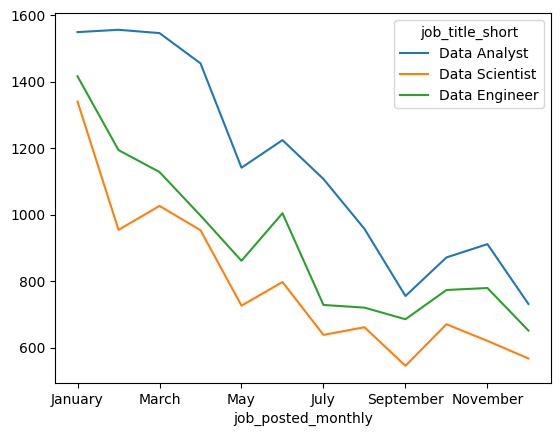

In [43]:
df_FR_pivot.plot(kind="line")